In [1]:
%cd ~/fur/
from wiggler_radiation.aperture import EllipticAperture
from wiggler_radiation.beam import Beam
from wiggler_radiation.wiggler import Wiggler
from wiggler_radiation.transmission_data import transmission_function
from wiggler_radiation.wiggler_radiation import WigglerRadiationSimulator
import numpy as np
import matplotlib.pyplot as plt

/home/ilobach/fur


In [2]:
wiggler = Wiggler()
beam = Beam(Ibeam_mA=1,
            sigma_x_um=800,
            sigma_y_um=80,
            sigma_z_cm=40)
aperture = EllipticAperture(mesh_size_1D=512)
wr_sim = WigglerRadiationSimulator(wiggler, beam, aperture)

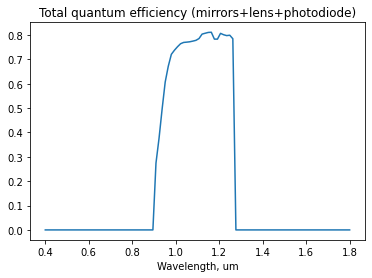

In [3]:
l_arr = np.linspace(0.4,1.8, 100)
plt.plot(l_arr, transmission_function(l_arr))
plt.title("Total quantum efficiency (mirrors+lens+photodiode)")
plt.xlabel("Wavelength, um")
plt.show()

In [4]:
lambda_vals = np.linspace(0.4, 1.8, 20)
intensity_arr = np.zeros(len(lambda_vals))
for i,l in enumerate(lambda_vals):
    print("Working on {} out of {}".format(i+1, len(lambda_vals)))
    intensity_arr[i] = wr_sim.calc_x_y_integral_1el(l)

Working on 1 out of 20


KeyboardInterrupt: 

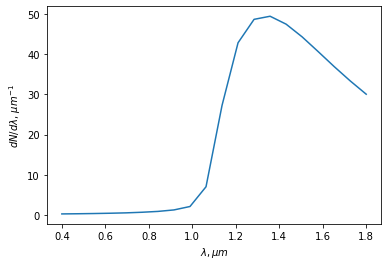

In [5]:
plt.plot(lambda_vals, intensity_arr)
plt.ylabel(r"$dN/d\lambda$, $\mu m^{-1}$")
plt.xlabel(r"$\lambda, \mu m$")
plt.show()

In [14]:
from scipy.special import sinc, jv

In [15]:
jv(1,2)

0.5767248077568736

In [6]:
(lambda_vals[1]-lambda_vals[0])*sum(intensity_arr)

30.564313257666363

In [5]:
wr_sim.lambda1_um*wr_sim.calc_Ih_1el(wr_sim.lambda1_um,0.00007,0)

10279.475959131289